torch.Size([2, 32000])


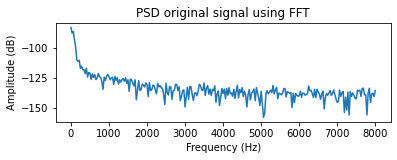

In [54]:
import torch
import matplotlib.pyplot as plt
import torch.fft as fft
import torchaudio

Fs=16000
N=512

freq = torch.linspace(0, Fs/2, N//2+1)


bin_sig,sample_rate = torchaudio.load('/Users/vtokala/Documents/Research/di_nn/Dataset/clean_testset_1f/p278_051_0.wav')

H_orig = fft.fft(bin_sig[0,:],N)
print(bin_sig.shape)
H_orig = H_orig[:N // 2 + 1]

PSD_orig = (1 / (Fs * N)) * torch.abs(H_orig).pow(2)
PSD_orig[1:-1] = 2 * PSD_orig[1:-1]

plt.figure()
plt.subplot(211)
plt.plot(freq, 10 * torch.log10(PSD_orig), linewidth=1.5)
plt.title('PSD original signal using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
# plt.ylim([-120, -30])
plt.show()

torch.Size([32000])
torch.Size([257, 320])
torch.Size([257, 320])


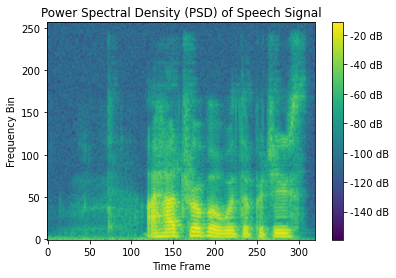

In [55]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from DCNN.feature_extractors import Stft, IStft

win_len = 400
win_inc = 100
fft_len = 512
fbins = int(fft_len/2 + 1)
# fbins=
avg_mode = 'freq'

stft = Stft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)
istft = IStft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)

# Load the speech signal
waveform, sample_rate = torchaudio.load("/Users/vtokala/Documents/Research/di_nn/Dataset/clean_testset_1f/p278_051_0.wav")
waveform = waveform[0,:]
# Apply a Hamming window
print(waveform.shape)
window = torch.hamming_window(waveform.size(0))

# waveform = waveform * window

# Compute the Short-Time Fourier Transform (STFT)
n_fft = 512  # Adjust this based on your requirements
hop_length = 100  # Adjust this based on your requirements
spectrogram = stft(waveform)
# spectrogram = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length)
print(spectrogram.shape)
# Calculate the Power Spectral Density (PSD)
psd = torch.abs(spectrogram)**2

# Sum across time to get the average PSD
# psd = psd.mean(dim=2)
print(psd.shape)

# Convert to dB scale
psd_db = 10 * torch.log10(psd)

# Plot the PSD
plt.figure()
plt.imshow(psd_db.numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Frame')
plt.title('Power Spectral Density (PSD) of Speech Signal')
plt.show()


torch.Size([2, 32000])
torch.Size([257, 320])


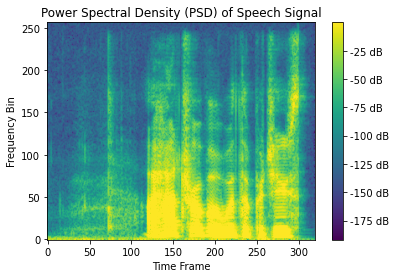

In [58]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from DCNN.feature_extractors import Stft, IStft

win_len = 400
win_inc = 100
fft_len = 512
fbins = int(fft_len/2 + 1)
# fbins=
avg_mode = 'freq'

stft = Stft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)
istft = IStft(n_dft=fft_len, hop_size=win_inc, win_length=win_len)

# Load the speech signal
waveform, sample_rate = torchaudio.load("/Users/vtokala/Documents/Research/di_nn/Dataset/clean_testset_1f/p278_051_0.wav")
waveform_l = waveform[0,:]
waveform_r = waveform[1,:]
# Apply a Hamming window
print(waveform.shape)
# window = torch.hamming_window(waveform.size(0))

# waveform = waveform * window

# Compute the Short-Time Fourier Transform (STFT)
# n_fft = 512  # Adjust this based on your requirements
# hop_length = 100  # Adjust this based on your requirements
spectrogram_l = stft(waveform_l)
spectrogram_r = stft(waveform_r)
# spectrogram = torch.stft(waveform, n_fft=n_fft, hop_length=hop_length)
# print(spectrogram_l.shape)
# Calculate the Power Spectral Density (PSD)
# psd_l = torch.abs(spectrogram_l)**2
# psd_r = torch.abs(spectrogram_r)**2

psd_l = spectrogram_l * torch.conj(spectrogram_l)
psd_r = spectrogram_r * torch.conj(spectrogram_r)

csd = spectrogram_l * torch.conj(spectrogram_r)
# Sum across time to get the average PSD
# psd = psd.mean(dim=2)
print(csd.shape)
ic = csd / torch.sqrt((psd_l*psd_r)+1e-8)
msc = csd.abs().pow(2) / torch.abs((psd_l*psd_r)+1e-8)
# Convert to dB scale
psd_db_l = 10 * torch.log10(psd_l)
psd_db_r = 10 * torch.log10(psd_r)

csd_db = 10 * torch.log10(csd.abs())
ic_db = 10 * torch.log10(ic.abs().pow(2))
msc_db = 10 * torch.log10(msc)
# Plot the PSD
plt.figure()
plt.imshow(msc_db.numpy(), cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.ylabel('Frequency Bin')
plt.xlabel('Time Frame')
plt.title('Power Spectral Density (PSD) of Speech Signal')
plt.show()

ic_t_db = ic_db.mean(dim=1)

Text(0, 0.5, 'Amplitude (dB)')

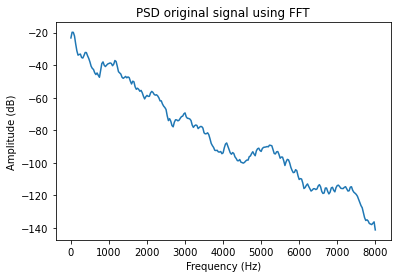

In [57]:
freq = torch.linspace(0, Fs/2, N//2+1)
plt.figure()
plt.plot(freq, ic_t_db, linewidth=1.5)
plt.title('PSD original signal using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
# plt.ylim([-120, -30])